In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torchvision.transforms as transforms
from einops import rearrange
import cv2
import os

# Simple Programming and Exploratory Analysis 

## Images

In [45]:
# Define a transform to convert images to tensors
transform = transforms.ToTensor()

# Download the MNIST dataset using torchvision
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Extract data and labels, convert to numpy arrays
# Stack all image tensors into a single tensor, then convert to numpy
images_np = mnist_train.data.numpy().reshape(-1, 28*28) # Reshape 28x28 images to 784-length vectors
labels_np = mnist_train.targets.numpy()
random_indices = np.random.randint(0, len(images_np), 1000)
sample_imgs = images_np[random_indices]
sample_labels = labels_np[random_indices]
print("Sample shape: ", sample_imgs.shape)
print("Label shape: ", sample_labels.shape)

Sample shape:  (1000, 784)
Label shape:  (1000,)


In [46]:
# Reshape images_np to (num_images, channels, height, width)
# MNIST images are 28x28 grayscale, so channels = 1
images_reshaped = sample_imgs.reshape(-1, 1, 28, 28)

# Define a batch size
batch_size = 25

# Calculate the number of images that can form full batches
num_full_batches = images_reshaped.shape[0] // batch_size
num_images_for_batching = num_full_batches * batch_size

# Use only images that can form full batches
images_for_batching = images_reshaped[:num_images_for_batching]

# Use einops.rearrange to batch the data
# This will create batches of (batch_of_batches, batch_size, channels, height, width)
batched_images = rearrange(images_for_batching, '(b n) c h w -> b n c h w', n=batch_size)

print(f"Original images_np shape: {images_np.shape}")
print(f"Reshaped images for einops (before slicing): {images_reshaped.shape}")
print(f"Number of images used for batching: {num_images_for_batching}")
print(f"Batched images shape using einops (batch_of_batches, batch_size, channels, height, width): {batched_images.shape}")

Original images_np shape: (60000, 784)
Reshaped images for einops (before slicing): (1000, 1, 28, 28)
Number of images used for batching: 1000
Batched images shape using einops (batch_of_batches, batch_size, channels, height, width): (40, 25, 1, 28, 28)


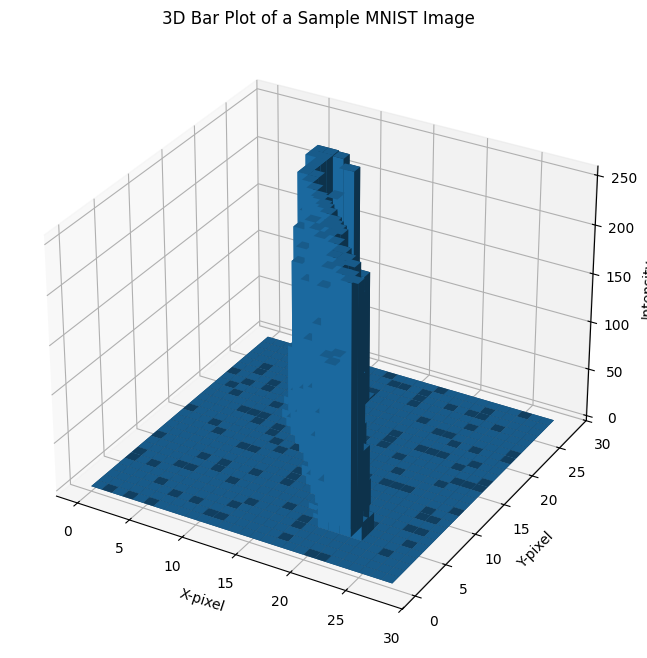

In [47]:
from mpl_toolkits.mplot3d import Axes3D

sample_image = batched_images[0, 0, 0, :, :]

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for 3D bar plot
xpos, ypos = np.meshgrid(np.arange(sample_image.shape[0]), np.arange(sample_image.shape[1]))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)
dx = dy = 1 * np.ones_like(xpos)
dz = sample_image.flatten()

# Plot the 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

ax.set_xlabel('X-pixel')
ax.set_ylabel('Y-pixel')
ax.set_zlabel('Intensity')
ax.set_title('3D Bar Plot of a Sample MNIST Image')

plt.show()



## Time Series

In [57]:
energy_df = pd.read_csv('data/energydata_complete.csv')
energy_df['date'] = pd.to_datetime(energy_df['date'])
energy_df['NSM'] = energy_df['date'].dt.hour * 3600 + energy_df['date'].dt.minute*60 + energy_df['date'].dt.second
energy_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600


Text(0.5, 1.0, 'Appliances Energy Consumption Over Time')

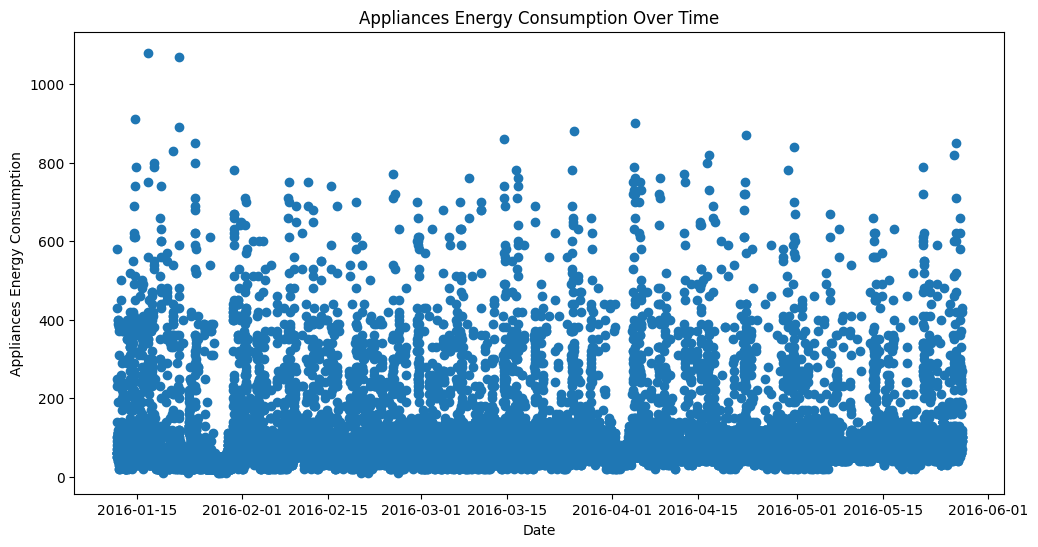

In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(energy_df['date'], energy_df['Appliances'])
plt.xlabel('Date')
plt.ylabel('Appliances Energy Consumption')
plt.title('Appliances Energy Consumption Over Time')

Text(0.5, 1.0, 'Appliances Energy Consumption from Feb 1 to Feb 7, 2016')

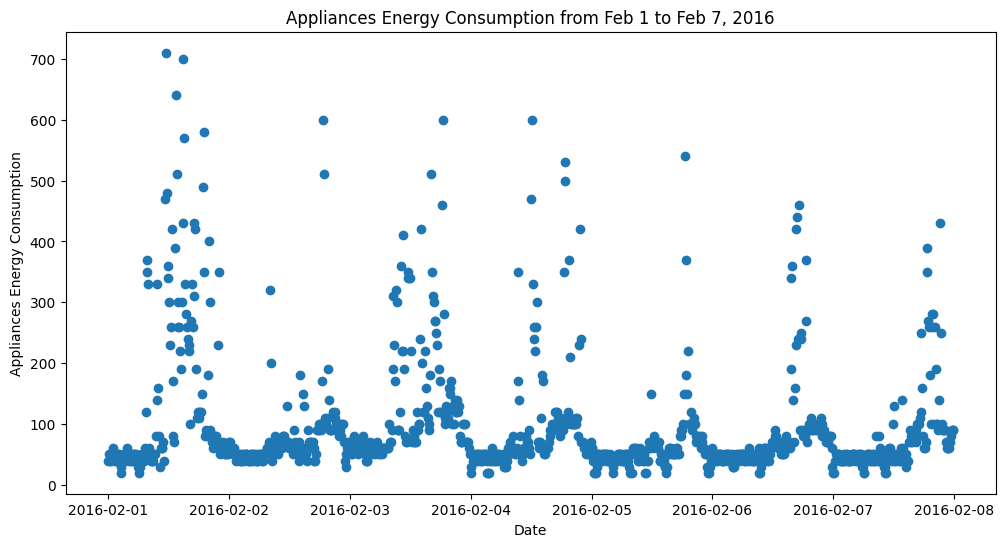

In [59]:
start_date = '2016-02-01'
end_date = '2016-02-08'
week_data = energy_df[(energy_df['date'] >= start_date) & (energy_df['date'] < end_date)]
plt.figure(figsize=(12, 6))
plt.scatter(week_data['date'], week_data['Appliances'])
plt.xlabel('Date')
plt.ylabel('Appliances Energy Consumption')
plt.title('Appliances Energy Consumption from Feb 1 to Feb 7, 2016')

C:\Users\manas\AppData\Local\Temp\ipykernel_39448\1087069922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['hour'] = week_data['date'].dt.hour
C:\Users\manas\AppData\Local\Temp\ipykernel_39448\1087069922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['day'] = week_data['date'].dt.day_name()
C:\Users\manas\AppData\Local\Temp\ipykernel_39448\1087069922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

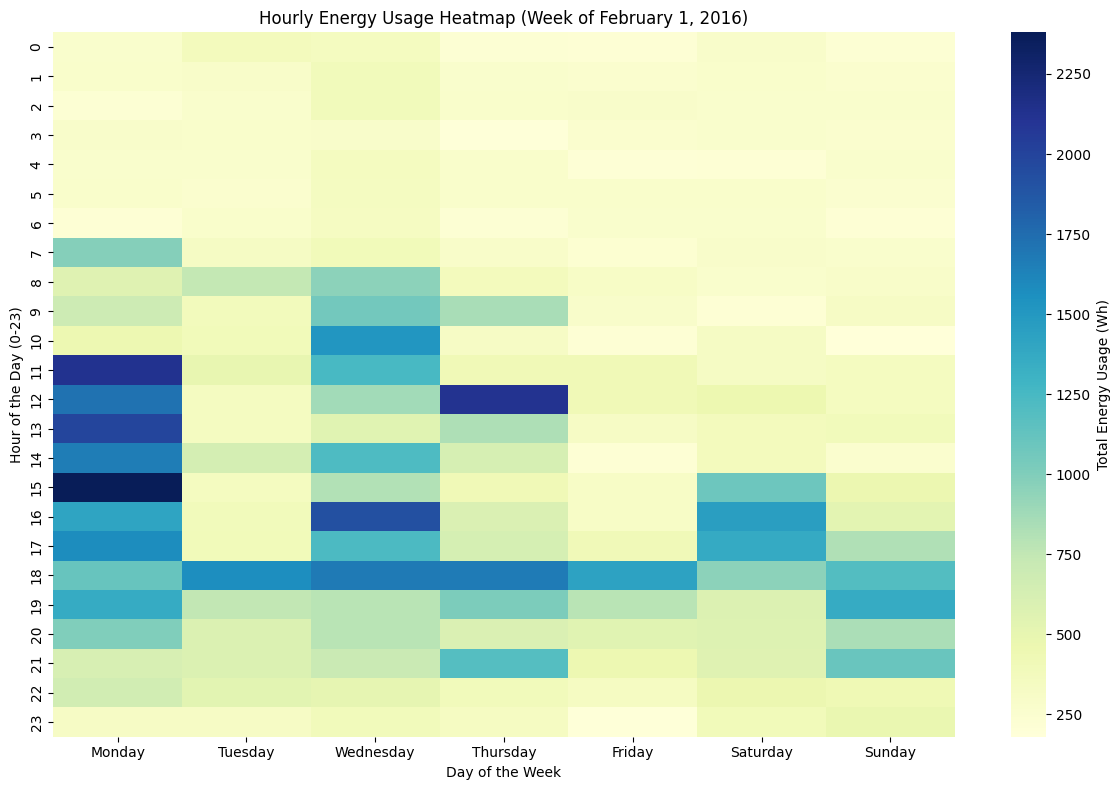

In [60]:
week_data['hour'] = week_data['date'].dt.hour
week_data['day'] = week_data['date'].dt.day_name()
week_data['day_index'] = week_data['date'].dt.dayofweek
hourly_data = week_data.groupby(['day_index', 'day', 'hour'])['Appliances'].sum().reset_index()
heatmap_pivot = hourly_data.pivot(index='hour', columns='day', values='Appliances')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot[days_order]
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Total Energy Usage (Wh)'})

plt.title('Hourly Energy Usage Heatmap (Week of February 1, 2016)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day (0-23)')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Appliances Energy Consumption')

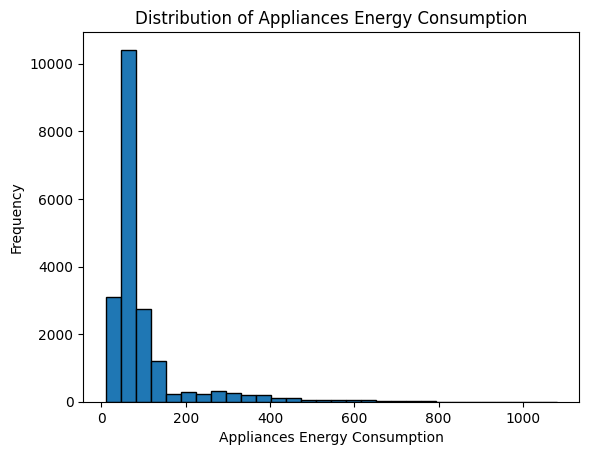

In [61]:
plt.hist(energy_df['Appliances'], bins=30, edgecolor='black')
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Appliances Energy Consumption')

C:\Users\manas\AppData\Local\Temp\ipykernel_39448\2081677367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['NSM'] = week_data['date'].dt.hour * 3600 + week_data['date'].dt.minute*60 + week_data['date'].dt.second


Text(0.5, 1.0, 'Appliances Energy Consumption vs. NSM for Week of Interest')

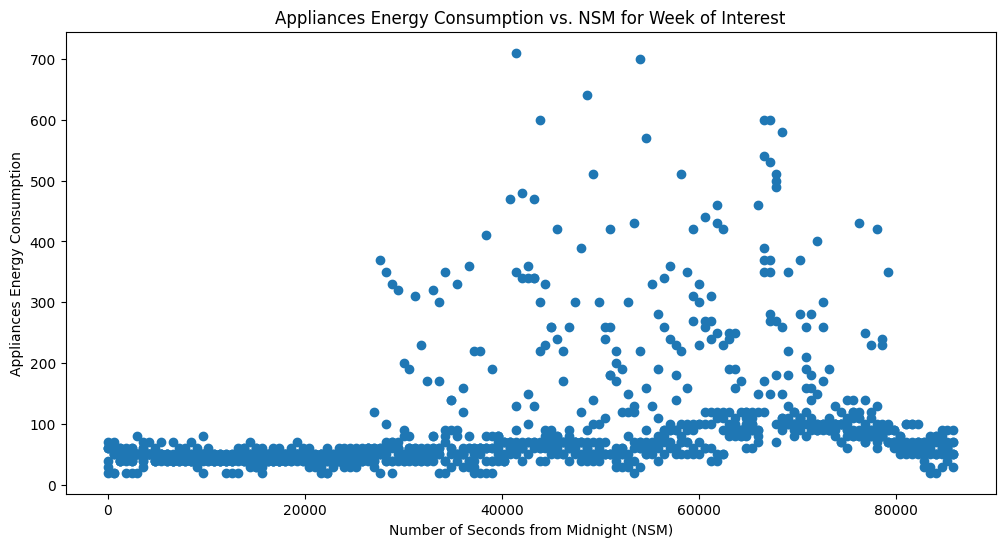

In [62]:
week_data['NSM'] = week_data['date'].dt.hour * 3600 + week_data['date'].dt.minute*60 + week_data['date'].dt.second
plt.figure(figsize=(12, 6))
plt.scatter(week_data['NSM'], week_data['Appliances'])
plt.xlabel('Number of Seconds from Midnight (NSM)')
plt.ylabel('Appliances Energy Consumption')
plt.title('Appliances Energy Consumption vs. NSM for Week of Interest')

Text(0.5, 1.0, 'Appliances Energy Consumption vs. Pressure for Week of Interest')

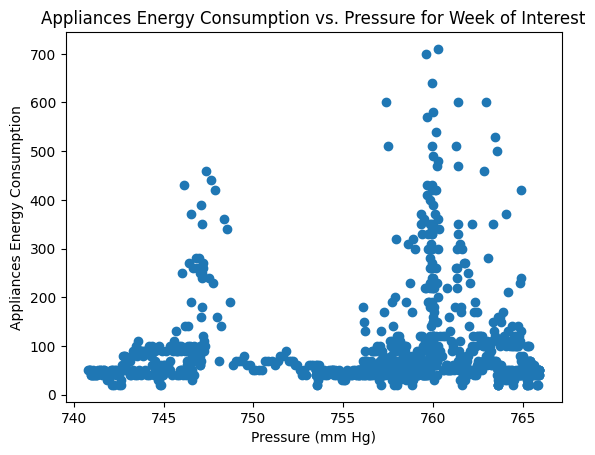

In [63]:
plt.scatter(week_data['Press_mm_hg'], week_data['Appliances'])
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Appliances Energy Consumption')
plt.title('Appliances Energy Consumption vs. Pressure for Week of Interest')

In [64]:
energy_df['NSMxPress_mm_hg'] = energy_df['NSM'] * energy_df['Press_mm_hg'] # Engineering new feature by multiplying NSM and Pressure
energy_df.corr()['Appliances'].abs().sort_values(ascending=False)

Appliances         1.000000
NSM                0.217152
NSMxPress_mm_hg    0.216453
lights             0.197278
RH_out             0.152282
T2                 0.120073
T6                 0.117638
T_out              0.099155
RH_8               0.094039
Windspeed          0.087122
RH_1               0.086031
T3                 0.085060
RH_6               0.083178
RH_2               0.060465
RH_7               0.055642
T1                 0.055447
RH_9               0.051462
T4                 0.040281
T8                 0.039572
RH_3               0.036292
Press_mm_hg        0.034885
T7                 0.025801
T5                 0.019760
RH_4               0.016965
Tdewpoint          0.015353
rv1                0.011145
rv2                0.011145
T9                 0.010010
date               0.009630
RH_5               0.006955
Visibility         0.000230
Name: Appliances, dtype: float64

In [65]:
from sklearn.ensemble import RandomForestRegressor
X = energy_df.drop(columns=['Appliances', 'date'])
y = energy_df['Appliances']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(importances[:15])

Feature Importances:
NSMxPress_mm_hg    0.143230
T3                 0.056172
NSM                0.049247
RH_3               0.045113
RH_5               0.040458
Press_mm_hg        0.039618
T8                 0.038569
RH_2               0.036842
RH_1               0.032964
Tdewpoint          0.031874
lights             0.029925
RH_4               0.029419
RH_8               0.029398
RH_6               0.029219
T9                 0.028910
dtype: float64


### Comments about Feature Importance
- NSM is an important feature, having the highest correlation as well as Random Forest based feature importance. 
- Press_mm_hg is an important feature but not directly. The NSM &times; Press_mm_hg becomes a much more important feature having a higher predictive power. 

## Multivariate

In [67]:
df = pd.read_csv('data/airfoil_self_noise.dat', sep = '\s+', header = None, names = ['frequency', 'attack_angle', 'chord_length', 'velocity_fs', 'ss_displacement', 'sound_pressure'])
for col in df.columns:
  print('\nColumn:',col)
  print("Mean:", df[col].mean())
  print("Standard Deviation:", df[col].std())
  print("Median:", df[col].median())
  print("Kurtosis:",df[col].kurtosis())
  print("Skewness:",df[col].skew())
  print("Range:", df[col].min(),',',df[col].max())


Column: frequency
Mean: 2886.3805721889553
Standard Deviation: 3152.5731369306686
Median: 1600.0
Kurtosis: 5.708685076629566
Skewness: 2.1370843370561032
Range: 200 , 20000

Column: attack_angle
Mean: 6.782302062541583
Standard Deviation: 5.918128124886475
Median: 5.4
Kurtosis: -0.4129507932946681
Skewness: 0.6891644015246552
Range: 0.0 , 22.2

Column: chord_length
Mean: 0.13654823685961412
Standard Deviation: 0.09354072837396629
Median: 0.1016
Kurtosis: -1.037964096539102
Skewness: 0.4574574796795428
Range: 0.0254 , 0.3048

Column: velocity_fs
Mean: 50.86074517631405
Standard Deviation: 15.57278439538569
Median: 39.6
Kurtosis: -1.5639512742591497
Skewness: 0.23585241419124836
Range: 31.7 , 71.3

Column: ss_displacement
Mean: 0.011139880391217565
Standard Deviation: 0.013150234266814775
Median: 0.00495741
Kurtosis: 2.218903124436665
Skewness: 1.7021645560889562
Range: 0.000400682 , 0.0584113

Column: sound_pressure
Mean: 124.83594278110448
Standard Deviation: 6.898656621628731
Median:

# Image Processing

## Image Pre-processing and transformation

In [70]:
def transform_image(rgb_image, rot, shift, scale, warp_factor):
    rows, cols, ch = rgb_image.shape
    
    center = (cols / 2, rows / 2)
    M_affine = cv2.getRotationMatrix2D(center, rot, scale)
    
    M_affine[0, 2] += shift[0]
    M_affine[1, 2] += shift[1]
    
    affine_out = cv2.warpAffine(rgb_image, M_affine, (cols, rows))
    
    src_pts = np.float32([[0, 0], [cols-1, 0], [0, rows-1], [cols-1, rows-1]])
    
    dst_pts = np.float32([
        [0 + warp_factor, 0], 
        [cols - 1 - warp_factor, 0], 
        [0, rows - 1], 
        [cols - 1, rows - 1]
    ])
    
    M_perspective = cv2.getPerspectiveTransform(src_pts, dst_pts)
    final_output = cv2.warpPerspective(affine_out, M_perspective, (cols, rows))
    
    return final_output

In [73]:
for img_path in os.listdir('data/Agricultural_Image_Analytics/leaves/'):
    img = cv2.imread(os.path.join('data/Agricultural_Image_Analytics/leaves', img_path))
    for i in range(13):
        rot = np.random.uniform(-90, 90)  # Random rotation between -90 and 90 degrees
        shift = (np.random.uniform(-20, 20), np.random.uniform(-20, 20))  # Random shift in x and y
        scale = np.random.uniform(0.8, 1.5)  # Random scale between 0.8 and 1.5
        warp_factor = np.random.uniform(0, 10)  # Random warp factor for perspective transformation
        transformed_img = transform_image(img, rot=rot, shift=shift, scale=scale, warp_factor=warp_factor)
        # plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
        cv2.imwrite(os.path.join('data/Agricultural_Image_Analytics/leaves', f'transformed_{i}_{img_path}.png'), transformed_img)
    